## Text enhancement in OpenCV

Here we explore different methods of cleaning an old document (containing a potato bread recipe). 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def show_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
def show_grayscale_img(img, title = ''):
    plt.figure(figsize = (10,15));
    plt.title(title)
    plt.imshow(img, cmap='gray')

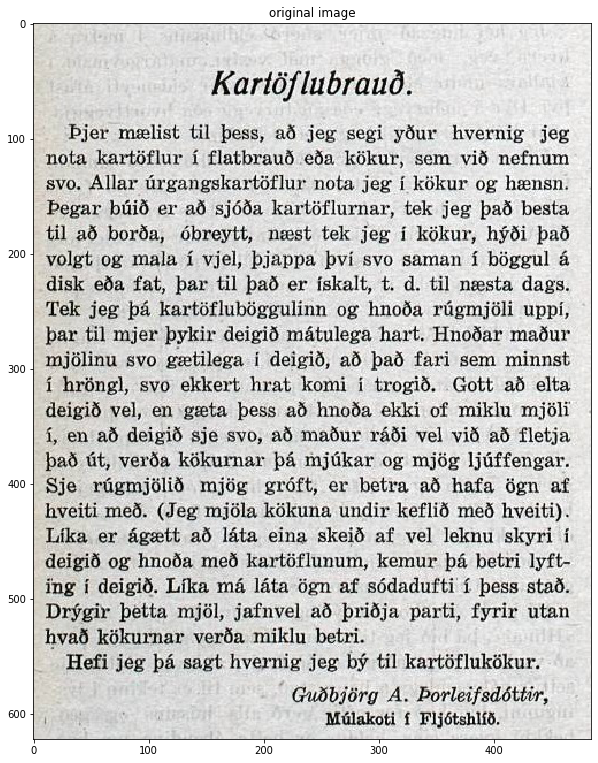

In [7]:
recipe = cv2.imread("../img/kartoflubraud.jpg")
show_img(recipe, "original image")

### Upsampling a bit to distinguish the smaller characters better


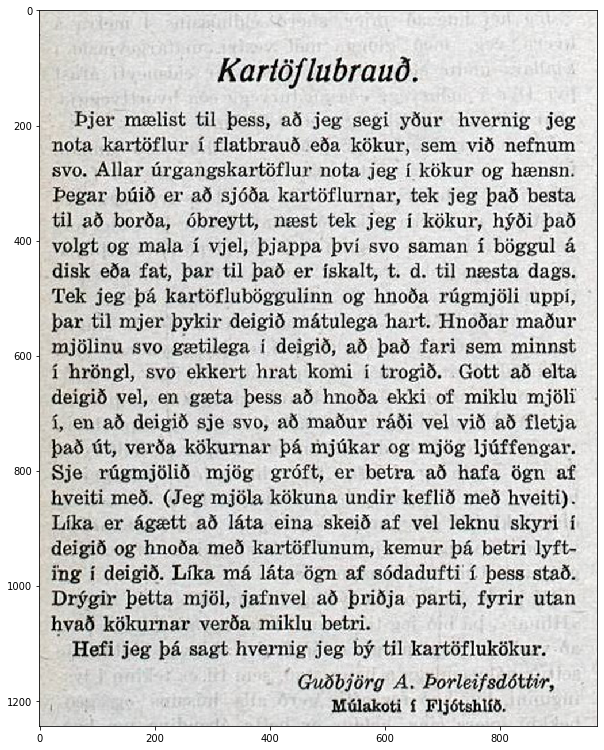

In [8]:
img = cv2.resize(recipe, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
show_img(img)

### Brightening the image

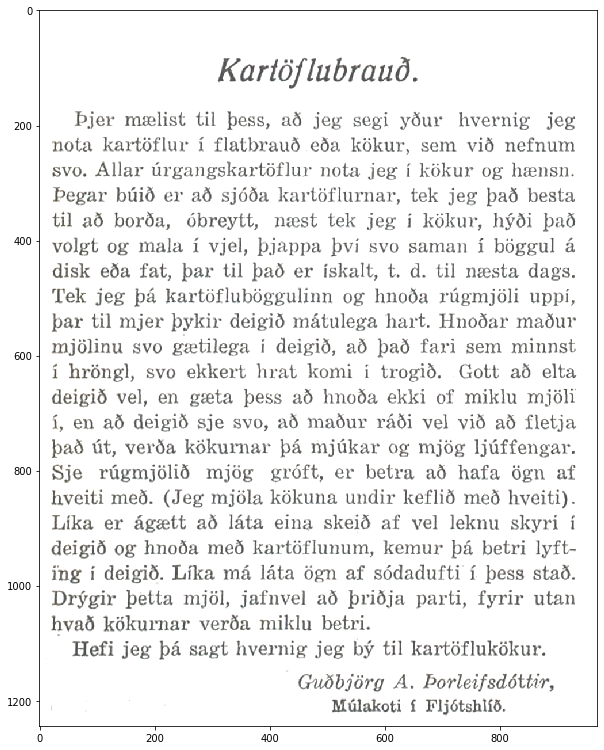

In [31]:
pixel_values_matrix = np.ones(img.shape,dtype='uint8') * 80
text2 = cv2.add(img,pixel_values_matrix)

show_img(text2)

### Splitting into HSV and testing masks to extract the text

<Figure size 1440x1080 with 0 Axes>

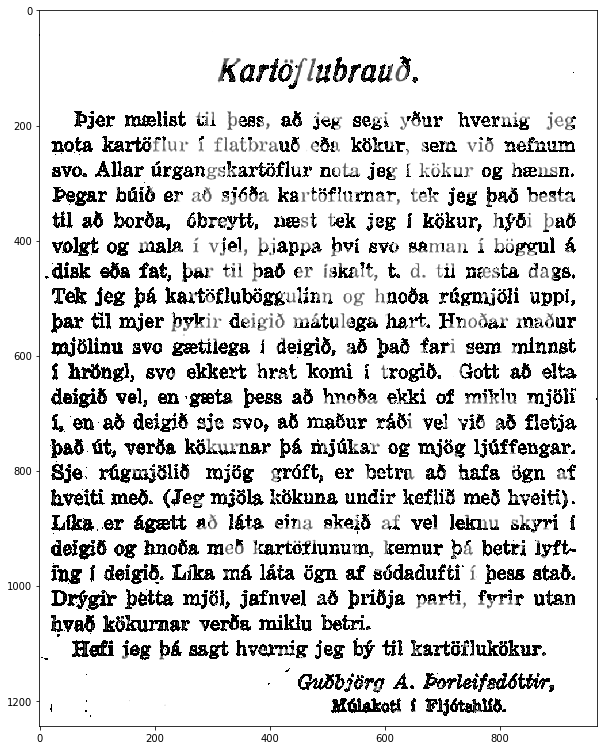

In [32]:
text_hsv = text2
plt.figure(figsize = (20,15))
hsv_img = cv2.cvtColor(text_hsv, cv2.COLOR_BGR2HSV)
hue =  hsv_img[:,:,0]
saturation = hsv_img[:,:,1]
value = hsv_img[:,:,2]

#plt.imshow(cv2.cvtColor(text_hsv,cv2.COLOR_BGR2RGB));

lower_range = (0,0,0)
upper_range = (0,0,255)
hsv_mask = cv2.inRange(hsv_img, lower_range, upper_range)
masked_image = np.copy(text_hsv)
masked_image[hsv_mask == 0 ] = [0,0,0]
show_img(masked_image)

### Different thresholding methods

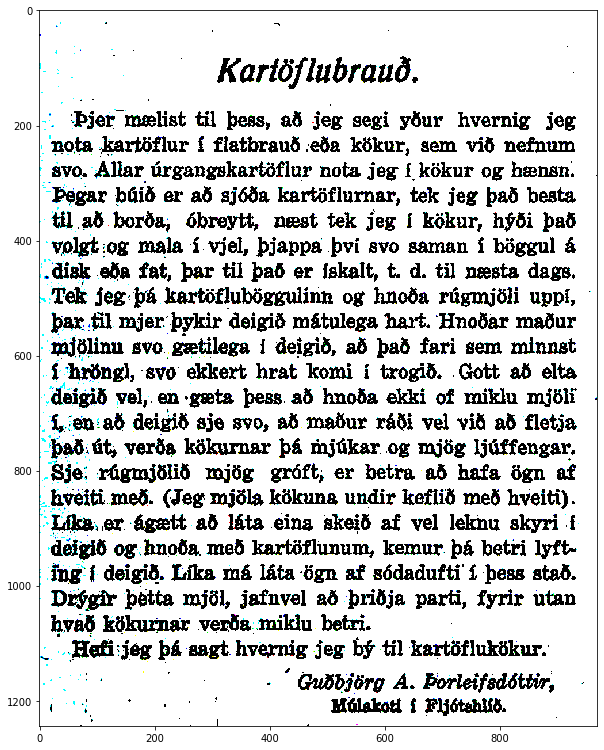

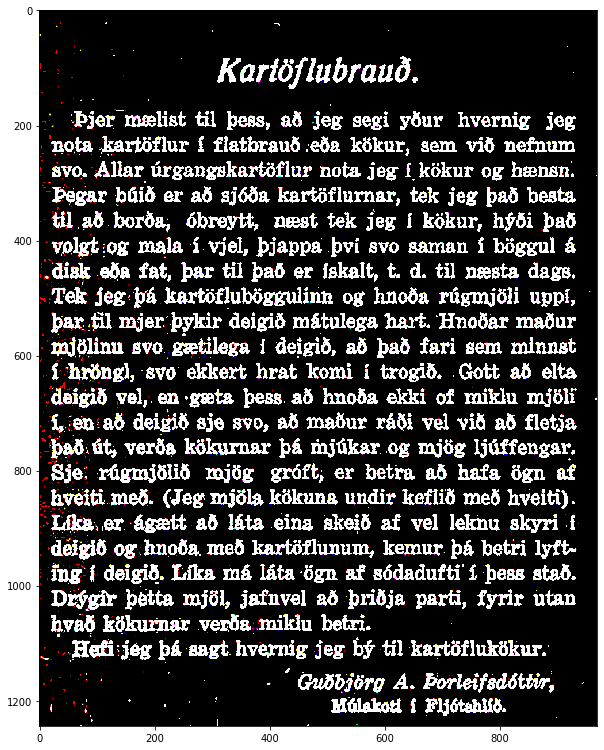

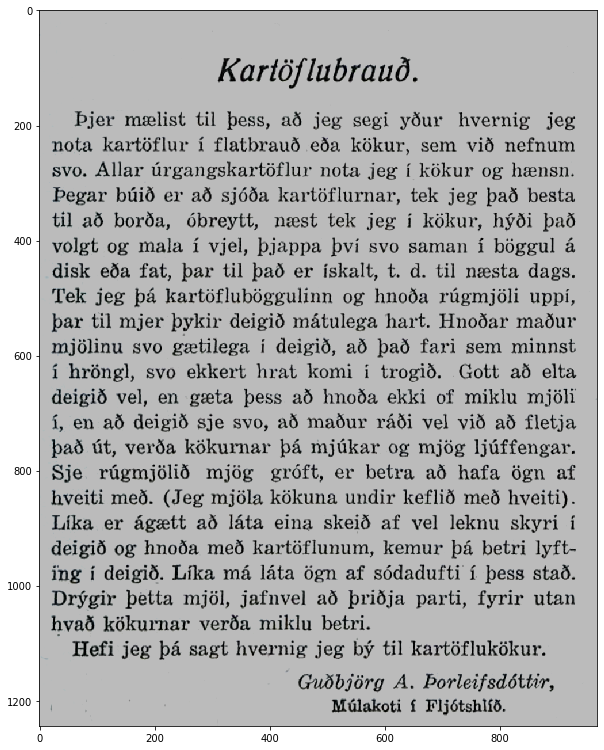

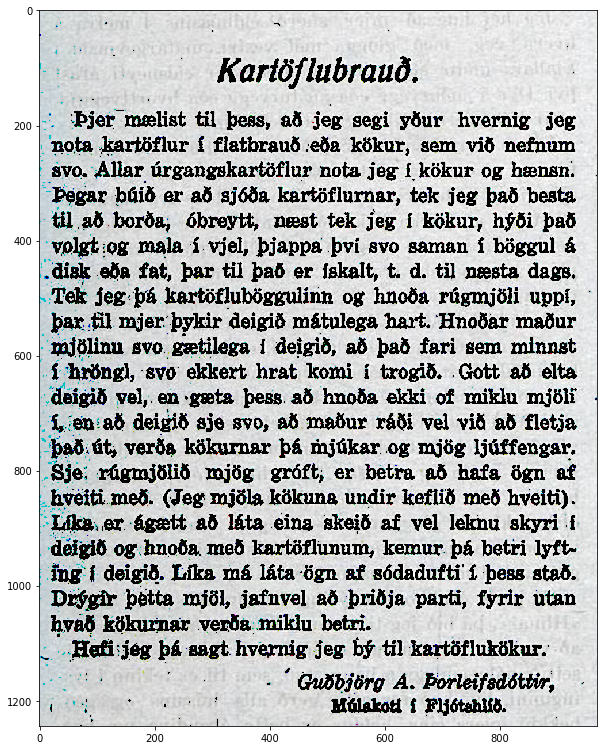

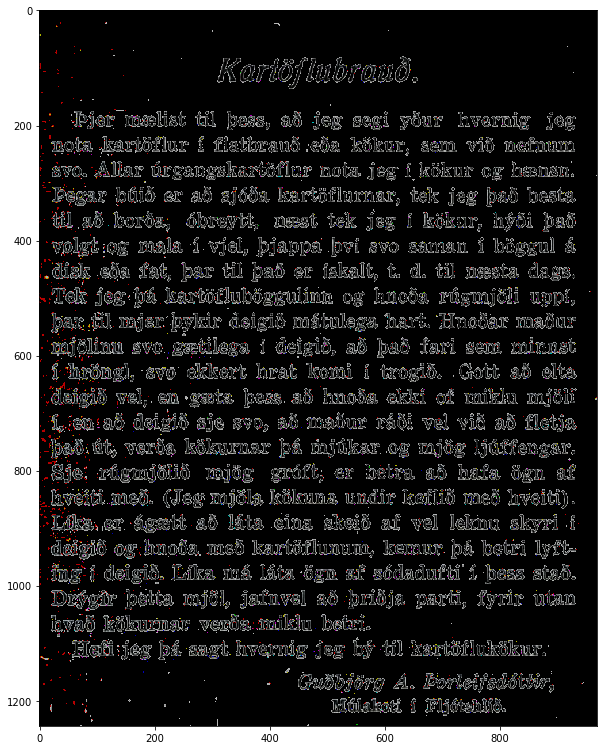

In [33]:
threshold = 187
max_value = 255

ret1, thresh1 = cv2.threshold(img, threshold, max_value, cv2.THRESH_BINARY)

ret2, thresh_binary_inverted = cv2.threshold(img, threshold, max_value, cv2.THRESH_BINARY_INV)

ret3, thresh3 = cv2.threshold(img, threshold, max_value, cv2.THRESH_TRUNC)

ret4, thresh4 = cv2.threshold(img, threshold, max_value, cv2.THRESH_TOZERO)

ret5, thresh5 = cv2.threshold(img, threshold, max_value, cv2.THRESH_TOZERO_INV)

thresh_list = [ thresh1, thresh_binary_inverted, thresh3, thresh4, thresh5]
for thr in thresh_list:
    show_grayscale_img(thr)

## Adaptive thresholding

For adaptive thresholding we need to work with a grayscale image.

In [17]:
img_gray = cv2.cvtColor(recipe, cv2.COLOR_BGRA2GRAY)

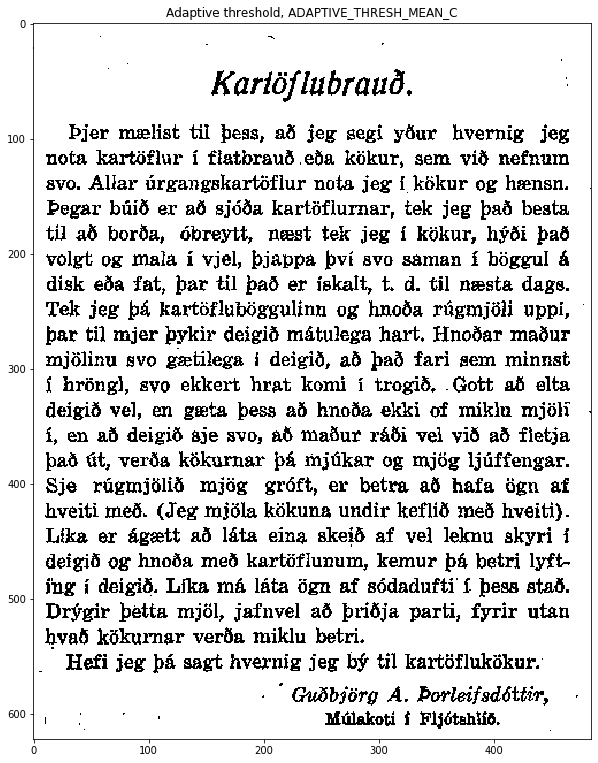

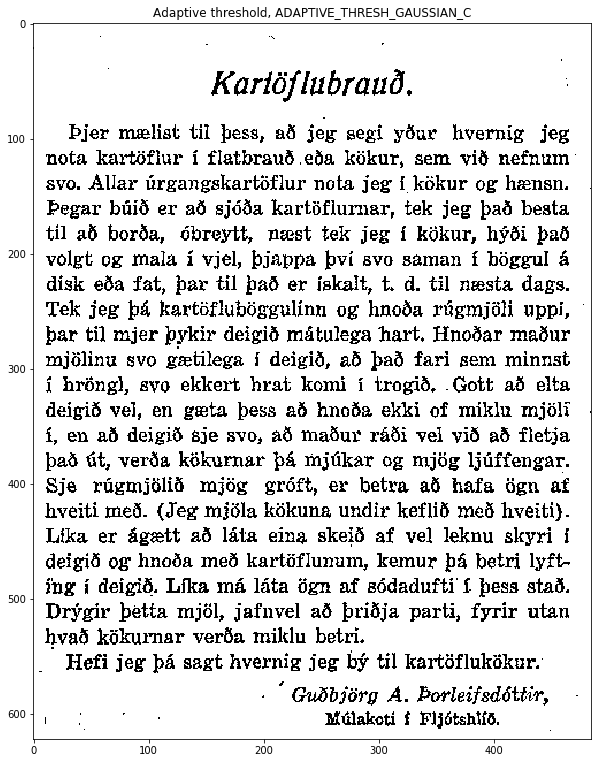

In [18]:
th2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 35)

th3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 35)

show_grayscale_img(th2, "Adaptive threshold, ADAPTIVE_THRESH_MEAN_C")

show_grayscale_img(th3, "Adaptive threshold, ADAPTIVE_THRESH_GAUSSIAN_C")


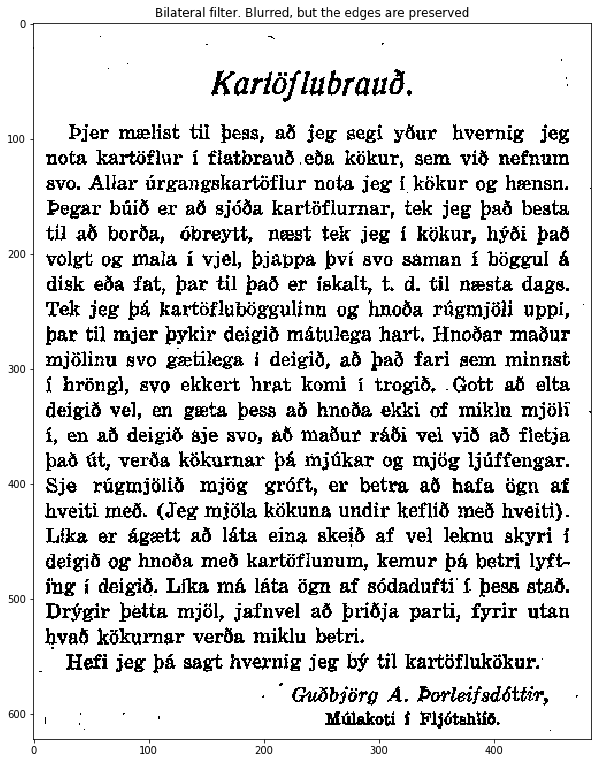

In [20]:
blur = cv2.bilateralFilter(th2, 9,33,33)
show_grayscale_img(blur, "Bilateral filter. Blurred, but the edges are preserved")

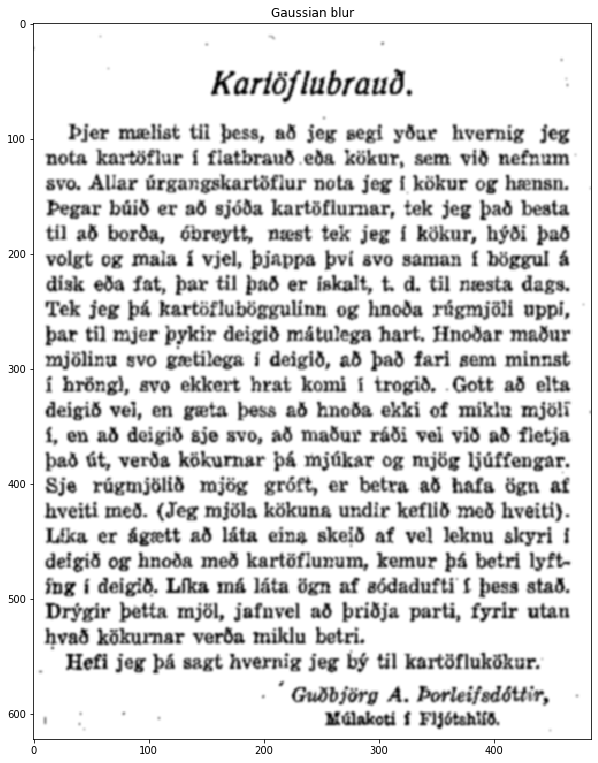

In [21]:
gaussian_blur = cv2.GaussianBlur(th3,(5,5),0) # can only use odd numbers!
show_grayscale_img(gaussian_blur, "Gaussian blur")

## Really dark image

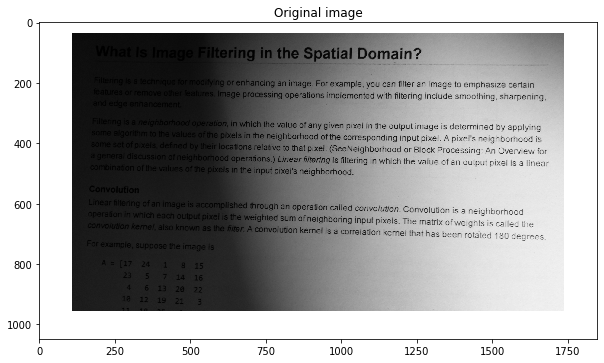

In [23]:
text_img = cv2.imread("../img/notes.png")
show_img(text_img, "Original image")
# turn to grayscale

text_img_gray = cv2.cvtColor(text_img, cv2.COLOR_BGR2GRAY)

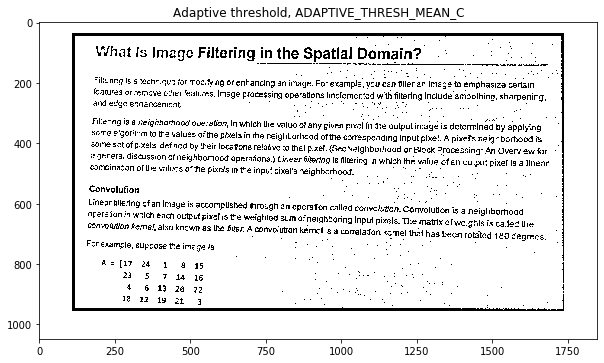

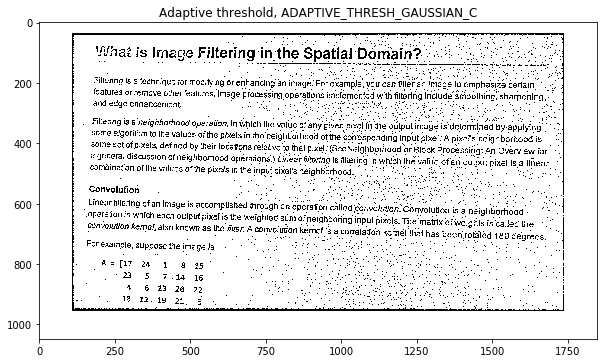

In [24]:
# first number: set a window to a number
# second number: the bigger the brighter
th2 = cv2.adaptiveThreshold(text_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)
th3 = cv2.adaptiveThreshold(text_img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 3)

show_grayscale_img(th2, "Adaptive threshold, ADAPTIVE_THRESH_MEAN_C")

show_grayscale_img(th3, "Adaptive threshold, ADAPTIVE_THRESH_GAUSSIAN_C")